# VGG16
VGG-16 (Visual Geometry Group 16) is a deep convolutional neural network architecture that is commonly used for image classification tasks.VGG-16 takes an image as input. The input image is typically resized to a fixed size, such as 224x224 pixels, to match the network's architecture.VGG-16 consists of 13 convolutional layers, with each layer having a set of filters to extract features from the input image. These layers perform various convolution and pooling operations to hierarchically learn features of increasing complexity, such as edges, textures, and object parts.
        After the convolutional layers, VGG-16 has three fully connected (dense) layers. These layers serve as a classifier by taking the high-level features extracted by the convolutional layers and learning to predict the class labels of the input image. Non-linear activation functions, such as ReLU (Rectified Linear Unit), are applied after each convolutional and fully connected layer to introduce non-linearity and enable the network to learn complex patterns in the data.The final layer of VGG-16 is a softmax layer, which is used to compute the probability distribution over multiple classes. It converts the raw scores from the previous layer into class probabilities, where each class is assigned a probability value.


Installing Kaagle Library

In [ ]:
pip install kaggle

uploading the kaagle API key to download datasets

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

Downloading the datset

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


 73% 11.0M/15.1M [00:00<00:00, 19.5MB/s]
100% 15.1M/15.1M [00:00<00:00, 16.1MB/s]


Importing Necessary Libraries

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten



<ipython-input-8-28ce48147740>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


Extraxting Zip File

In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.chdir('/content/brain_tumor_dataset/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/brain_tumor_dataset/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [ ]:
print(img.shape)

(224, 224, 3)


Plot the training Images

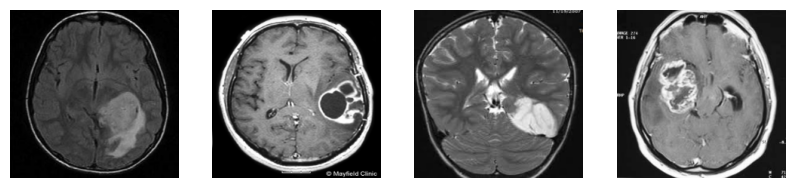

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

Split the Data Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


import Vgg16 Model

In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 2s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Visualization Of Model

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 18.2 MB/s eta 0:00:00


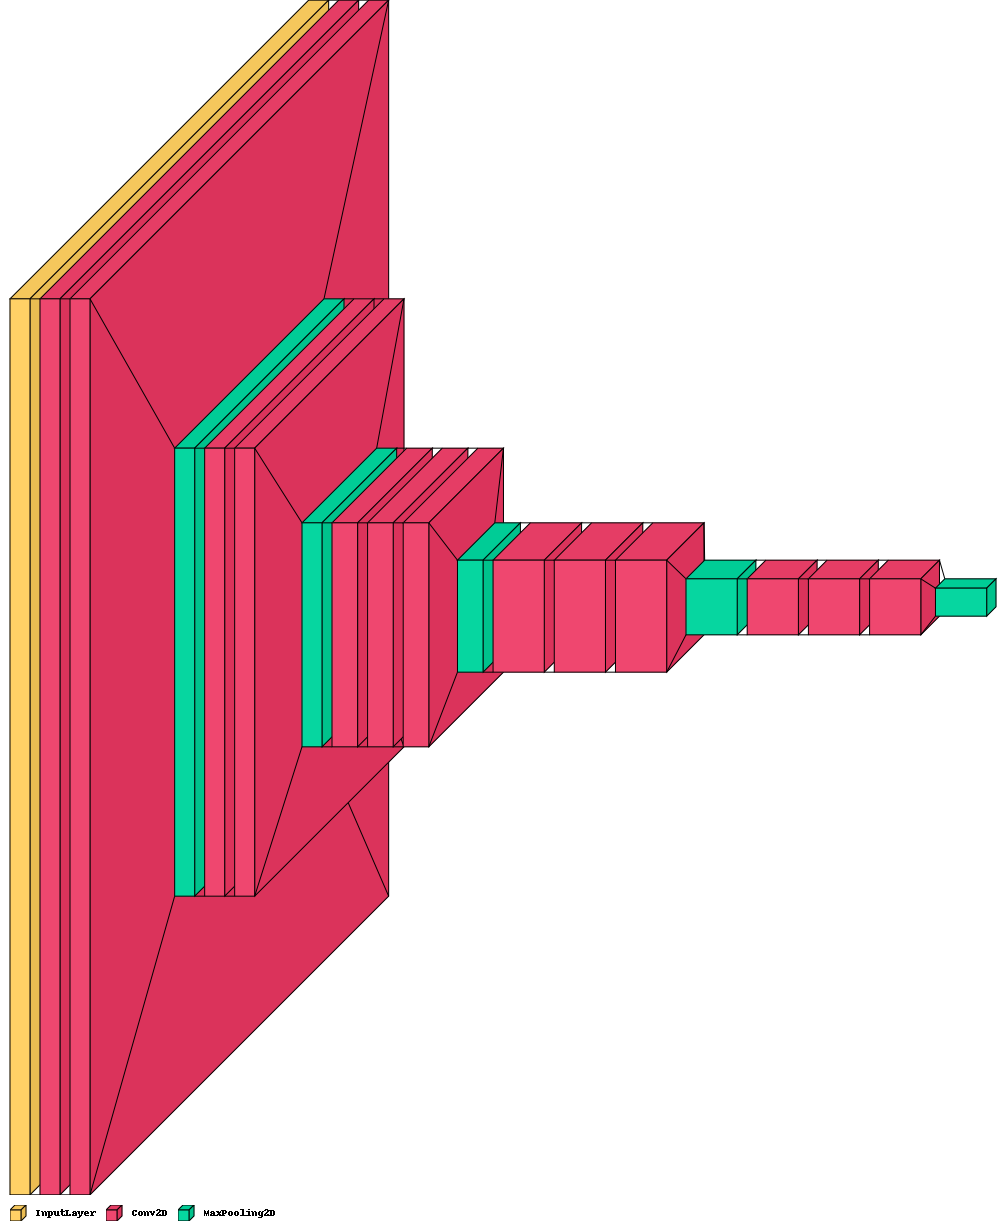

In [ ]:
import visualkeras
from IPython.display import display
from PIL import Image
visualkeras.layered_view(vgg).show() # display using your system viewer
visualkeras.layered_view(vgg, to_file='output.png') # write to disk
visualkeras.layered_view(vgg, to_file='output.png',legend=True).show() # write and show
img = Image.open('output.png')
display(img)



Training

In [ ]:
from tensorflow.keras.models import Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Adjust the learning rate
model.compile(optimizer="Adam", loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/20
6/6 [==============================] - 55s 221ms/step - loss: 6.0528 - accuracy: 0.5680 - val_loss: 0.6856 - val_accuracy: 0.7143
Epoch 2/20
6/6 [==============================] - 1s 238ms/step - loss: 0.9578 - accuracy: 0.6805 - val_loss: 0.8808 - val_accuracy: 0.7381
Epoch 3/20
6/6 [==============================] - 1s 174ms/step - loss: 0.4207 - accuracy: 0.8462 - val_loss: 0.5393 - val_accuracy: 0.7738
Epoch 4/20
6/6 [==============================] - 1s 232ms/step - loss: 0.2774 - accuracy: 0.8994 - val_loss: 0.4458 - val_accuracy: 0.8452
Epoch 5/20
6/6 [==============================] - 1s 232ms/step - loss: 0.1976 - accuracy: 0.9112 - val_loss: 0.4873 - val_accuracy: 0.8452
Epoch 6/20
6/6 [==============================] - 1s 173ms/step - loss: 0.1168 - accuracy: 0.9645 - val_loss: 0.4870 - val_accuracy: 0.8452
Epoch 7/20
6/6 [==============================] - 1s 232ms/step - loss: 0.0622 - accuracy: 0.9763 - val_loss: 0.5001 - val_accuracy: 0.8214
Epoch 8/20
6/6 [===

**Testing**

1/1 [==============================] - 0s 148ms/step


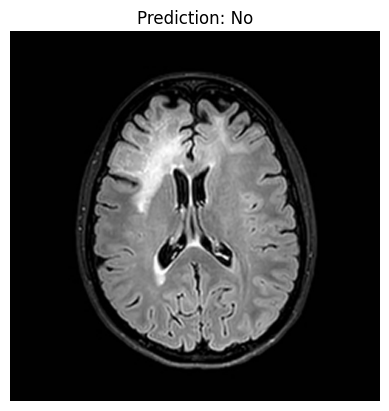

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image_path ="/content/brain_tumor_dataset/no/no 10.jpg"  # Replace with the path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image / 255.0  # Normalize pixel values (assuming VGG16 preprocessing)

# Make predictions
predictions = model.predict(test_image)

# Interpret the prediction result
if predictions[0][0] > predictions[0][1]:
    prediction_label = "No"
else:
    prediction_label = "Yes"

# Display the test image along with the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 29ms/step


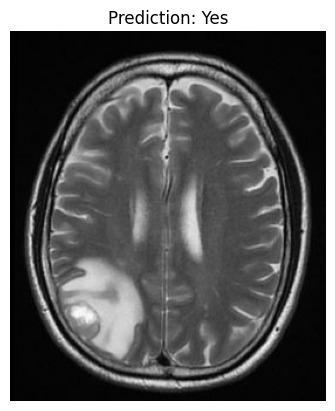

In [ ]:
test_image_path ="/content/brain_tumor_dataset/yes/Y163.JPG"  # Replace with the path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image / 255.0  # Normalize pixel values (assuming VGG16 preprocessing)

# Make predictions
predictions = model.predict(test_image)
threshold = 0.6  # Adjust the threshold as needed
if predictions[0][0] > threshold:
    prediction_label = "No"
else:
    prediction_label = "Yes"
# Display the test image along with the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()